<a href="https://colab.research.google.com/github/p25-c4/kurly_project/blob/main/0318_SG_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [21]:
# !pip install xgboost

In [22]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !rm ~/.cache/matplotlib -rf

In [23]:
import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

# 데이터 구성:Series, DataFrame
import numpy as np
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 예측/회귀 Gradient Boosting
from xgboost import XGBRegressor

# 평가 지수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [24]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

# Load the data

In [25]:
# 데이터 불러오기
df = pd.read_csv("df_model.csv")
df.tail(10)

,Date,남성,여성,2030s,4060s,Delay_YN,여성 비율,2030s 비율,target
1085,2023-12-22,383.0,746.0,796.0,333.0,0.024801,0.660762,0.705049,16659780.0
1086,2023-12-23,38.0,32.0,47.0,23.0,0.000000,0.457143,0.671429,1479180.0
1087,2023-12-24,702.0,902.0,1184.0,420.0,0.027431,0.562344,0.738155,28730790.0
1088,2023-12-25,413.0,667.0,817.0,263.0,0.012963,0.617593,0.756481,NaN
1089,2023-12-26,600.0,881.0,979.0,502.0,0.020932,0.594868,0.661040,NaN
1090,2023-12-27,578.0,795.0,1038.0,335.0,0.049527,0.579024,0.756009,NaN
1091,2023-12-28,554.0,855.0,938.0,471.0,0.026260,0.606813,0.665720,NaN
1092,2023-12-29,432.0,629.0,759.0,302.0,0.032045,0.592837,0.715363,NaN
1093,2023-12-30,37.0,57.0,64.0,30.0,0.000000,0.606383,0.680851,NaN
1094,2023-12-31,788.0,1009.0,1375.0,422.0,0.046745,0.561491,0.765164,NaN


In [26]:
# Date 열 삭제
df_raw = df.drop('Date', axis = 1)
df_raw

,남성,여성,2030s,4060s,Delay_YN,여성 비율,2030s 비율,target
0,679.000000,865.000000,1026.00000,518.0,0.024611,0.560233,0.664508,1.829174e+07
1,623178.809524,27.108108,30.04878,16.0,0.039746,0.604011,0.604011,6.231788e+05
2,8.000000,31.000000,20.00000,19.0,0.000000,0.794872,0.512821,1.308180e+06
3,808.000000,1347.000000,1445.00000,710.0,0.043619,0.625058,0.670534,2.877023e+07
4,160.000000,233.000000,266.00000,127.0,0.025445,0.592875,0.676845,4.363620e+06
...,...,...,...,...,...,...,...,...
1090,578.000000,795.000000,1038.00000,335.0,0.049527,0.579024,0.756009,NaN
1091,554.000000,855.000000,938.00000,471.0,0.026260,0.606813,0.665720,NaN
1092,432.000000,629.000000,759.00000,302.0,0.032045,0.592837,0.715363,NaN
1093,37.000000,57.000000,64.00000,30.0,0.000000,0.606383,0.680851,NaN


In [27]:
# train & test용 데이터와 prediction용 데이터로 분리
df_train_test = df_raw[df_raw['target'].notnull()]
df_train_test_x = df_train_test.drop('target', axis=1)
df_train_test_y = df_train_test['target']
df_prediction = df_raw[df_raw['target'].isnull()]
df_prediction_x = df_prediction.drop('target', axis=1)
df_prediction_y = df_prediction['target']
print("train_test_x shape: ", df_train_test_x.shape)
print("train_test_y shape: ", df_train_test_y.shape)
print("prediction_x shape: ", df_prediction_x.shape)
print("prediction_y shape: ", df_prediction_y.shape)

train_test_x shape:  (1088, 7)
train_test_y shape:  (1088,)
prediction_x shape:  (7, 7)
prediction_y shape:  (7,)


# train test split

In [28]:
# train_test 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_test_x, df_train_test_y , test_size = 0.3)
print("train_x shape: ", df_train_x.shape)
print("train_y shape: ", df_train_y.shape)
print("test_x shape: ", df_test_x.shape)
print("test_y shape: ", df_test_y.shape)

train_x shape:  (761, 7)
train_y shape:  (761,)
test_x shape:  (327, 7)
test_y shape:  (327,)


# XGB
    - lr, gamma만 조절

In [29]:
# 기본 모델 생성
xgb_uncust = XGBRegressor()
xgb_uncust.fit(df_train_x, df_train_y)

# train 데이터 성능
print("train R-squared: ", xgb_uncust.score(df_train_x, df_train_y))
print("test R-squared: ", xgb_uncust.score(df_test_x, df_test_y))

train R-squared:  0.9982460119433553
test R-squared:  0.9396076033770796


## lr

In [30]:
# train 및 test 정확도 결과 저장용
train_r2 = []; test_r2 = []
# max_depth: 최대 깊이 변경. 1~10
para_lr = [lr * 0.1 for lr in range(1, 11)]

for lr in para_lr:
    xgb = XGBRegressor(lr = lr)
    xgb.fit(df_train_x, df_train_y)
    train_r2.append(xgb.score(df_train_x, df_train_y))
    test_r2.append(xgb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_r2_lr = pd.DataFrame()
df_r2_lr["lr"] = para_lr
df_r2_lr["Train R2"] = train_r2
df_r2_lr["Test R2"] = test_r2

df_r2_lr.round(3)

,lr,Train R2,Test R2
0,0.1,0.998,0.94
1,0.2,0.998,0.94
2,0.3,0.998,0.94
3,0.4,0.998,0.94
4,0.5,0.998,0.94
5,0.6,0.998,0.94
6,0.7,0.998,0.94
7,0.8,0.998,0.94
8,0.9,0.998,0.94
9,1.0,0.998,0.94


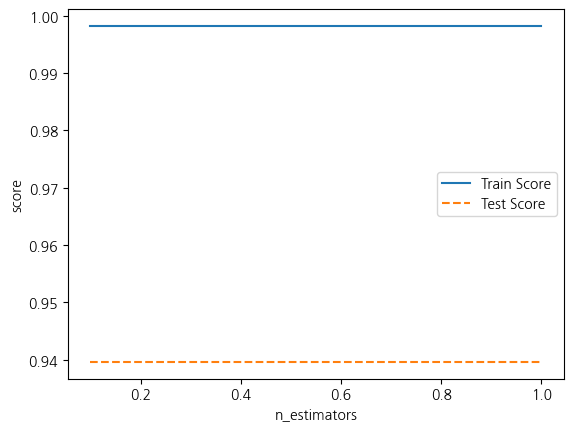

In [31]:
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_r2, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_r2, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

## gamma

In [ ]:
XGBRegressor()

In [39]:
# train 및 test 정확도 결과 저장용
train_r2 = []; test_r2 = []
# max_depth: 최대 깊이 변경. 1~10
para_gamma = [gamma for gamma in range(0, 11)]

for gamma in para_gamma:
    xgb = XGBRegressor(gamma = gamma)
    xgb.fit(df_train_x, df_train_y)
    train_r2.append(xgb.score(df_train_x, df_train_y))
    test_r2.append(xgb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_r2_gamma = pd.DataFrame()
df_r2_gamma["gamma"] = para_gamma
df_r2_gamma["Train R2"] = train_r2
df_r2_gamma["Test R2"] = test_r2

df_r2_gamma.round(3)

,gamma,Train R2,Test R2
0,0,0.998,0.94
1,1,0.998,0.94
2,2,0.998,0.94
3,3,0.998,0.94
4,4,0.998,0.94
5,5,0.998,0.94
6,6,0.998,0.94
7,7,0.998,0.94
8,8,0.998,0.94
9,9,0.998,0.94


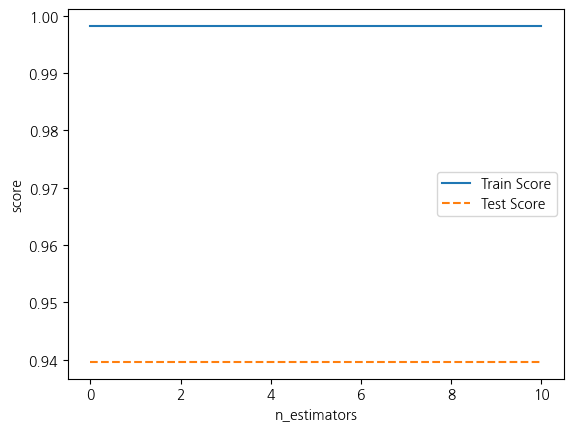

In [41]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_r2, linestyle = "-", label = "Train Score")
plt.plot(para_gamma, test_r2, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [43]:
xgb = XGBRegressor()
xgb.fit(df_train_x, df_train_y)
y_pred = xgb.predict(df_test_x)

print("MSE: ", mse(y_pred, df_test_y))
print("RMSE: ", np.sqrt(mse(y_pred, df_test_y)))
print("MAE: ", mae(y_pred, df_test_y))
print("MAPE: ", mape(y_pred, df_test_y))

MSE:  281499459979899.4
RMSE:  16777945.642416995
MAE:  14962765.333187185
MAPE:  0.9996500477417886
